In [1]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import zipfile
# import os

# # Path to the zip file
# zip_file_path = '/content/drive/MyDrive/final_data-20241120T205149Z-001.zip'

# # Destination directory where files will be extracted
# extract_dir = '/content/drive/MyDrive/'

# # Ensure the directory exists
# os.makedirs(extract_dir, exist_ok=True)

# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print(f"Files extracted to {extract_dir}")


Files extracted to /content/drive/MyDrive/


In [ ]:
train_dir = '/content/drive/MyDrive/final_data/train'
val_dir = '/content/drive/MyDrive/final_data/validation'
test_dir = '/content/drive/MyDrive/final_data/test'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 25075 images belonging to 2 classes.
Found 8359 images belonging to 2 classes.
Found 8359 images belonging to 2 classes.


In [ ]:
from collections import Counter

train_class_indices = train_generator.class_indices
test_class_indices = test_generator.class_indices
val_class_indices = val_generator.class_indices

train_class_labels = train_generator.classes
test_class_labels = test_generator.classes
val_class_labels = val_generator.classes

train_class_counts = Counter(train_class_labels)
test_class_counts = Counter(test_class_labels)
val_class_counts = Counter(val_class_labels)

print("Class Names for train:\n", train_class_indices)
print("Class Counts for train:\n", train_class_counts)
print(end='\n')

print("Class Names for test:\n", test_class_indices)
print("Class Counts for test:\n", test_class_counts)
print(end='\n')

print("Class Names for validation :\n", val_class_indices)
print("Class Counts for validation:\n", val_class_counts)

Class Names for train:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for train:
 Counter({0: 13408, 1: 11667})

Class Names for test:
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for test:
 Counter({0: 4470, 1: 3889})

Class Names for validation :
 {'Drowsy': 0, 'Non Drowsy': 1}
Class Counts for validation:
 Counter({0: 4470, 1: 3889})


Pixels of the 28th image after Normalization: 

[[[0.5882353  0.5137255  0.46274513]
  [0.5058824  0.44705886 0.4039216 ]
  [0.4784314  0.42352945 0.40784317]
  ...
  [0.882353   0.78823537 0.77647066]
  [0.882353   0.78823537 0.7725491 ]
  [0.882353   0.78823537 0.7686275 ]]

 [[0.5647059  0.49411768 0.44705886]
  [0.5019608  0.43921572 0.41176474]
  [0.5019608  0.45098042 0.43529415]
  ...
  [0.882353   0.78823537 0.77647066]
  [0.882353   0.78823537 0.7725491 ]
  [0.882353   0.78823537 0.7725491 ]]

 [[0.4901961  0.427451   0.3803922 ]
  [0.48235297 0.41960788 0.40000004]
  [0.5294118  0.47450984 0.4666667 ]
  ...
  [0.8705883  0.79215693 0.7725491 ]
  [0.8705883  0.7960785  0.77647066]
  [0.8705883  0.79215693 0.7725491 ]]

 ...

 [[0.5254902  0.38823533 0.32156864]
  [0.48627454 0.36078432 0.29411766]
  [0.43921572 0.33333334 0.2627451 ]
  ...
  [0.10588236 0.10588236 0.14117648]
  [0.11764707 0.10588236 0.14509805]
  [0.12941177 0.1137255  0.14509805]]

 [[0.52156866 0.37647063 0

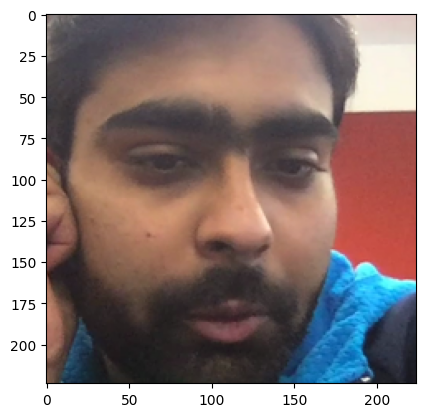

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(train_generator)
print(f"Pixels of the 28th image after Normalization: \n\n{images[27]}") #print pixels of the first img
plt.imshow(images[27])
plt.show()

In [ ]:
print(f"there are { images[27].ndim} Channels ")
print(f"image shape : {images[27].shape}")

there are 3 Channels 
image shape : (224, 224, 3)


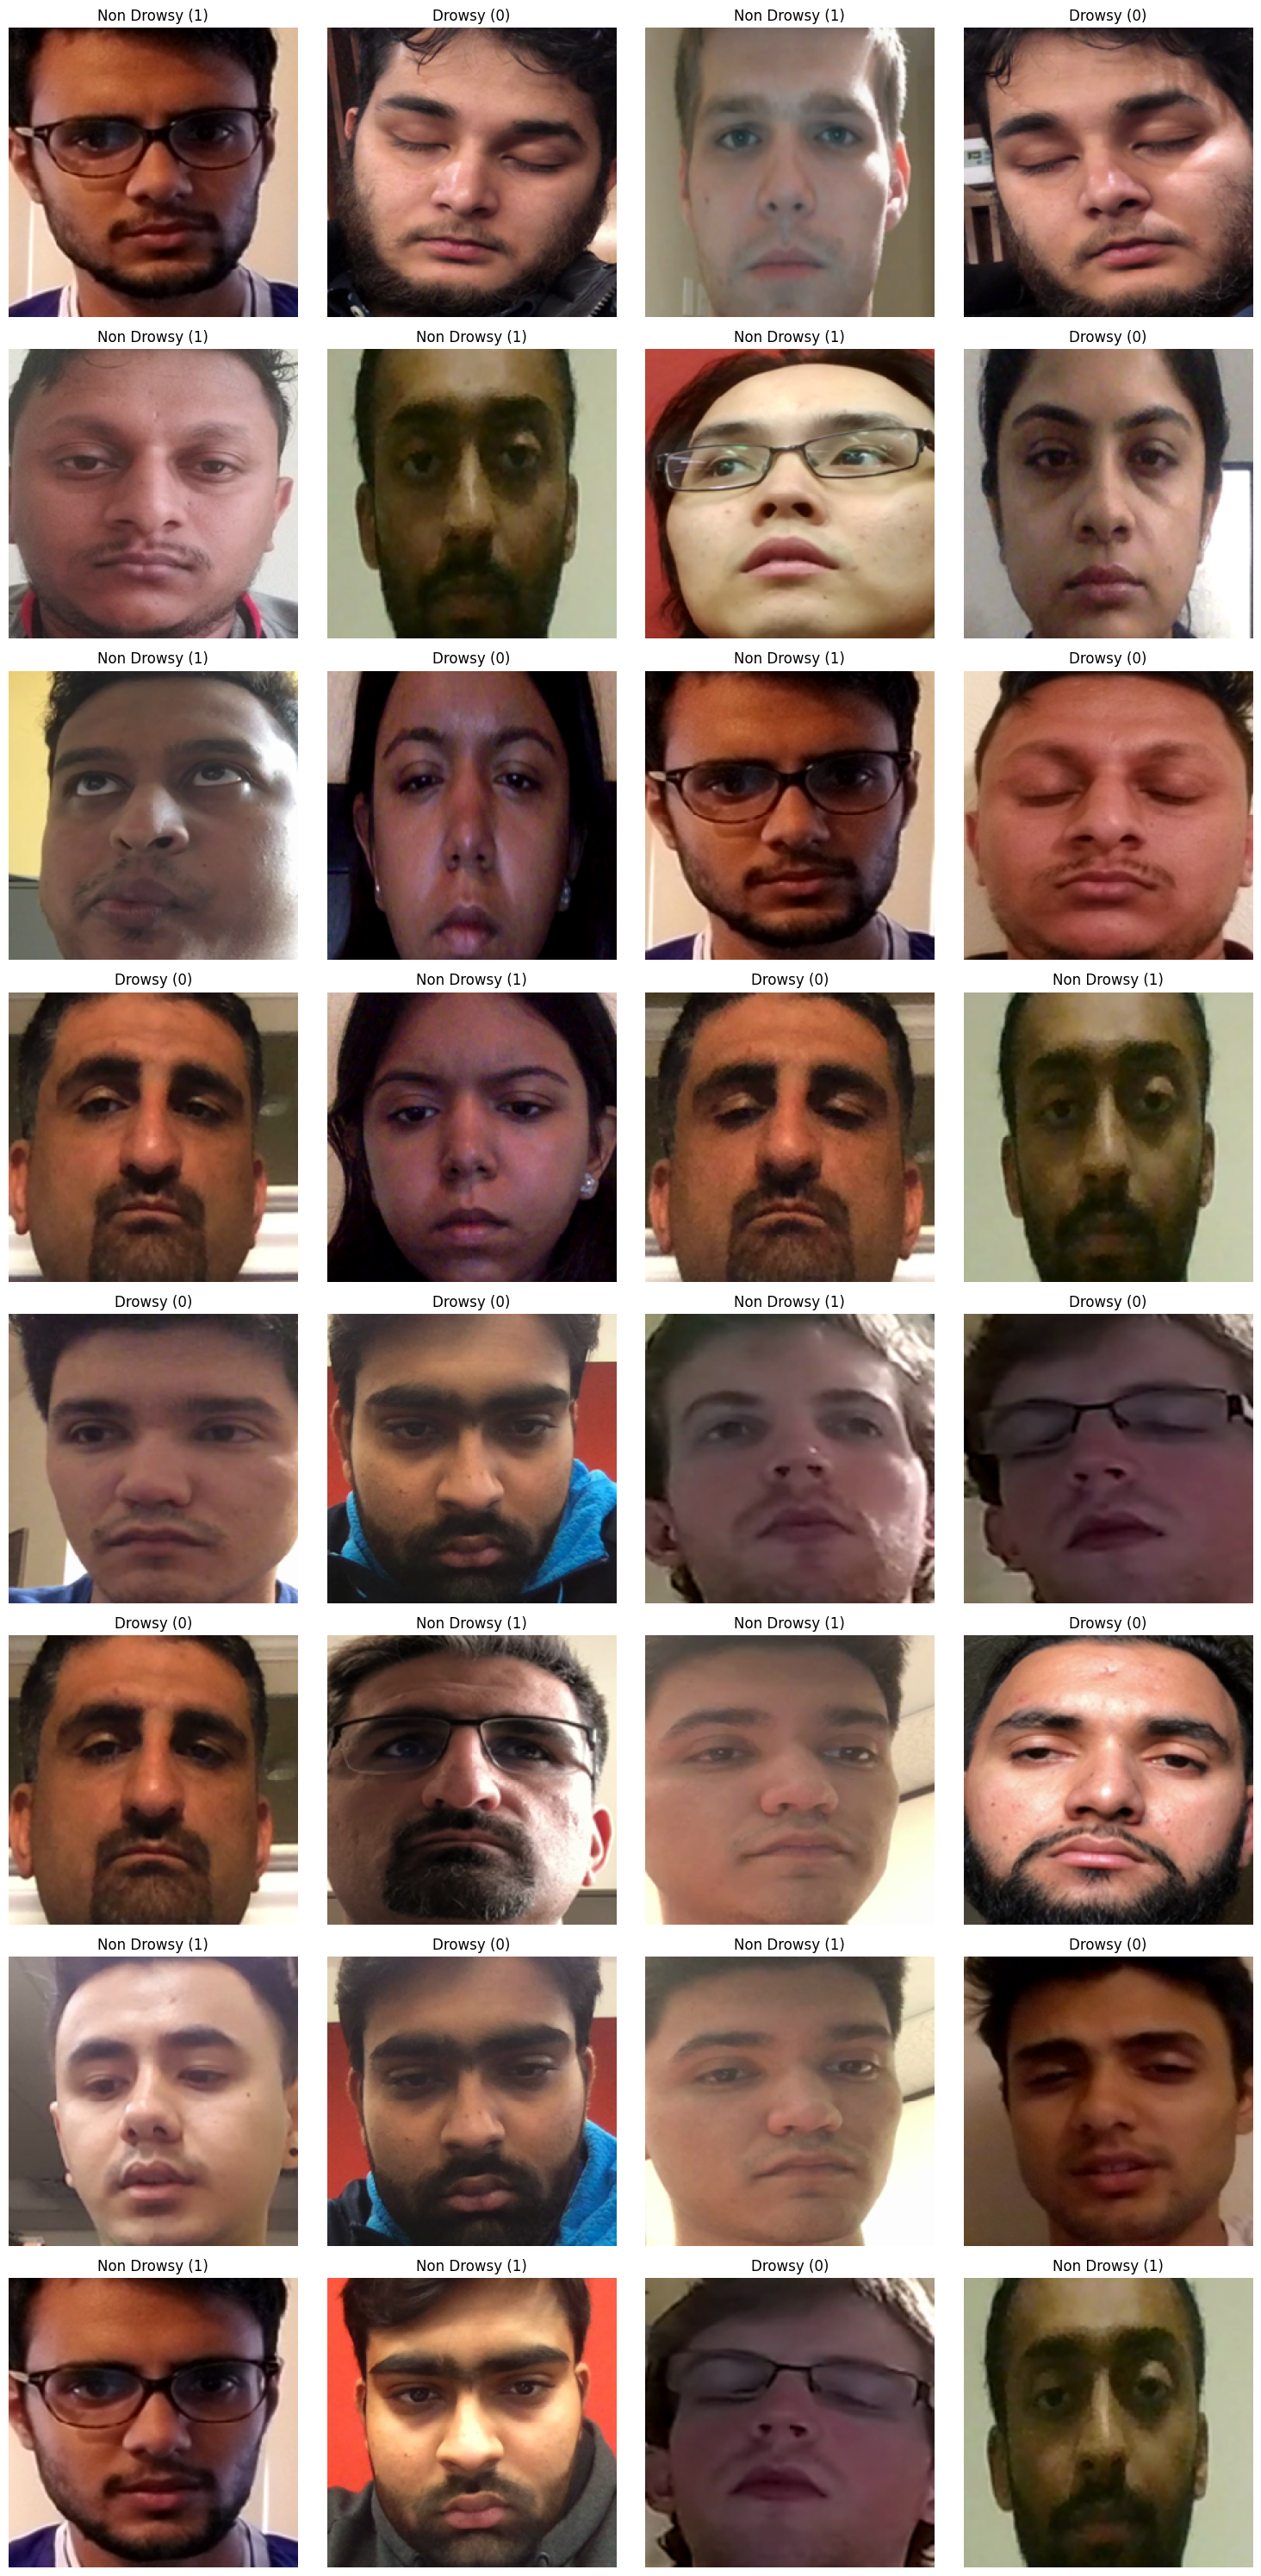

In [ ]:
fig, axes = plt.subplots(8, 4, figsize=(15, 30))
class_indices = train_generator.class_indices

for i in range(8):
    images, labels = next(train_generator)
    for j in range(4):

        ax = axes[i, j]
        ax.imshow(images[j])
        ax.axis('off')
        label = int(labels[j])
        label_name = list(class_indices.keys())[list(class_indices.values()).index(label)]
        ax.set_title(f'{label_name} ({label})')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Create the CNN model
cnn_model = Sequential([
    # Convolutional layers with Batch Normalization
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(1, activation='sigmoid')  # Binary classification
])

In [ ]:
# Compile the model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
# Model summary
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      9280      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 186624)            0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [ ]:
# Train the CNN model
history = cnn_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    batch_size=32
)

Epoch 1/10
 20/784 [..............................] - ETA: 1:50:06 - loss: 7.3206 - accuracy: 0.5938

KeyboardInterrupt: 

In [ ]:
# Evaluate the model
loss, accuracy = cnn_model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

In [ ]:
# Predict on test data
y_pred = cnn_model.predict(test_generator)

# Convert predictions to binary labels
y_pred_labels = (y_pred > 0.5).astype(int).flatten()

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_generator.labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
type(base_model)

keras.src.engine.functional.Functional

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
model=keras.Sequential()

for layer in base_model.layers[:-25] :
    layer.trainable = False


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
model.compile(optimizer=Adam(0.001 ),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
   train_generator,
    epochs=10,
    validation_data=val_generator,
    batch_size=32
)

Epoch 1/10
784/784 [==============================] - 598s 758ms/step - loss: 0.3200 - accuracy: 0.9726 - val_loss: 21.6632 - val_accuracy: 0.7955
Epoch 2/10
784/784 [==============================] - 462s 589ms/step - loss: 0.0707 - accuracy: 0.9931 - val_loss: 24.1827 - val_accuracy: 0.6781
Epoch 3/10
784/784 [==============================] - 466s 594ms/step - loss: 0.0077 - accuracy: 0.9984 - val_loss: 0.0989 - val_accuracy: 0.9870
Epoch 4/10
784/784 [==============================] - 465s 593ms/step - loss: 0.0084 - accuracy: 0.9984 - val_loss: 0.0889 - val_accuracy: 0.9890
Epoch 5/10
784/784 [==============================] - 466s 595ms/step - loss: 0.0099 - accuracy: 0.9978 - val_loss: 0.0059 - val_accuracy: 0.9990
Epoch 6/10
784/784 [==============================] - 463s 590ms/step - loss: 0.0089 - accuracy: 0.9984 - val_loss: 0.0245 - val_accuracy: 0.9961
Epoch 7/10
784/784 [==============================] - 465s 593ms/step - loss: 0.0945 - accuracy: 0.9949 - val_loss: 0.3905

In [ ]:
model.save("DD_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/DD_model.h5")

In [ ]:
loss, accuracy = model.evaluate(test_generator)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

262/262 [==============================] - 70s 267ms/step - loss: 0.0058 - accuracy: 0.9992
Test Loss: 0.0058
Test Accuracy: 99.92%


In [ ]:
y_pred = model.predict(test_generator)

262/262 [==============================] - 72s 272ms/step


In [ ]:
import numpy as np
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
y_actual = test_generator.labels

In [ ]:
conf_matrix = confusion_matrix(y_actual, y_pred_labels)

print(conf_matrix)

[[4469    1]
 [   6 3883]]


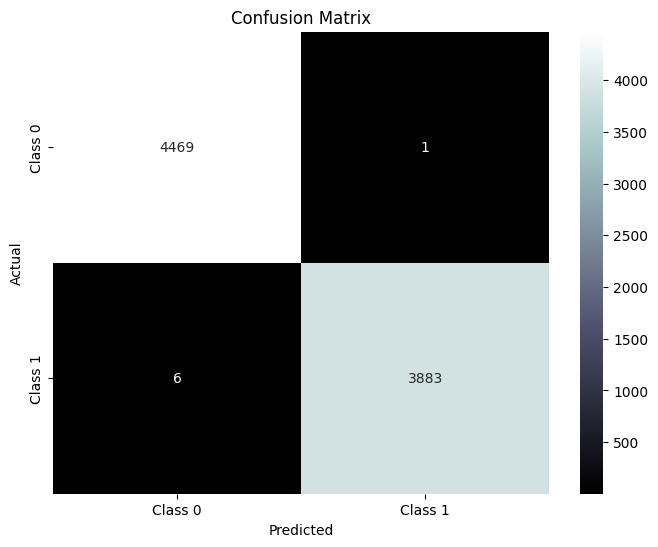

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='bone',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_actual, y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4470
           1       1.00      1.00      1.00      3889

    accuracy                           1.00      8359
   macro avg       1.00      1.00      1.00      8359
weighted avg       1.00      1.00      1.00      8359



In [3]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/DD_model.h5")

1/1 [==============================] - 0s 74ms/step


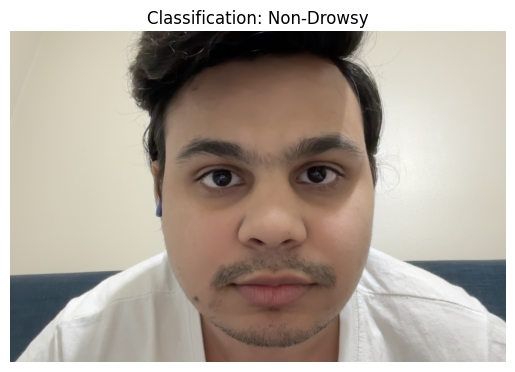

In [47]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# # Path to your saved .h5 model
# model_path = "DD_model.h5"

# # Load the model
# model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    """
    Preprocess the image for model input.
    Args:
        image_path: str, path to the image file.
        target_size: tuple, target size for resizing the image (height, width).
    Returns:
        Preprocessed image as a numpy array.
    """
    # Load the image with the specified target size
    image = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    image = img_to_array(image)
    # Expand dimensions to match the model's input shape
    image = np.expand_dims(image, axis=0)
    # Normalize the image (if required by the model)
    image = image / 255.0
    return image

# Function to classify the image
def classify_image(model, image):
    """
    Classify the image using the model.
    Args:
        model: Keras model object.
        image: numpy array, preprocessed image.
    Returns:
        str, classification result ("Drowsy" or "Non-Drowsy").
    """
    prediction = model.predict(image)
    # Assuming binary classification: 0 = Non-Drowsy, 1 = Drowsy
    class_label = "Drowsy" if prediction[0][0] > 0.5 else "Non-Drowsy"
    return class_label

# Function to display the image with the classification result
def display_image_with_result(image_path, result):
    """
    Display the image with the classification result.
    Args:
        image_path: str, path to the image file.
        result: str, classification result.
    """
    # Load the image for display (do not resize here)
    image = load_img(image_path)
    plt.imshow(image)
    plt.title(f"Classification: {result}")
    plt.axis("off")  # Remove axes for a cleaner display
    plt.show()

# Example: Path to a random image
image_path = "/content/drive/MyDrive/awake.jpg"

# Preprocess the image (update target_size to match your model's input size)
input_size = (224, 224)  # Example size, update if your model uses a different input size
preprocessed_image = preprocess_image(image_path, input_size)

# Classify the image
result = classify_image(model, preprocessed_image)

# Display the image with the classification result
display_image_with_result(image_path, result)

1/1 [==============================] - 0s 85ms/step


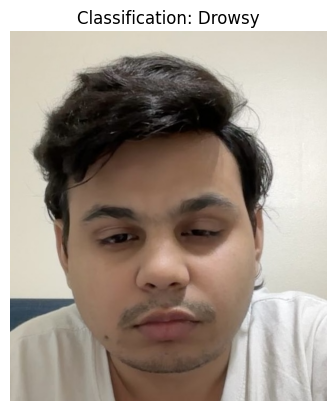

In [48]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# # Path to your saved .h5 model
# model_path = "DD_model.h5"

# # Load the model
# model = load_model(model_path)

# Function to preprocess the image
def preprocess_image(image_path, target_size):
    """
    Preprocess the image for model input.
    Args:
        image_path: str, path to the image file.
        target_size: tuple, target size for resizing the image (height, width).
    Returns:
        Preprocessed image as a numpy array.
    """
    # Load the image with the specified target size
    image = load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    image = img_to_array(image)
    # Expand dimensions to match the model's input shape
    image = np.expand_dims(image, axis=0)
    # Normalize the image (if required by the model)
    image = image / 255.0
    return image

# Function to classify the image
def classify_image(model, image):
    """
    Classify the image using the model.
    Args:
        model: Keras model object.
        image: numpy array, preprocessed image.
    Returns:
        str, classification result ("Drowsy" or "Non-Drowsy").
    """
    prediction = model.predict(image)
    # Assuming binary classification: 0 = Non-Drowsy, 1 = Drowsy
    class_label = "Drowsy" if prediction[0][0] > 0.5 else "Non-Drowsy"
    return class_label

# Function to display the image with the classification result
def display_image_with_result(image_path, result):
    """
    Display the image with the classification result.
    Args:
        image_path: str, path to the image file.
        result: str, classification result.
    """
    # Load the image for display (do not resize here)
    image = load_img(image_path)
    plt.imshow(image)
    plt.title(f"Classification: {result}")
    plt.axis("off")  # Remove axes for a cleaner display
    plt.show()

# Example: Path to a random image
image_path = "/content/drive/MyDrive/dz.jpg"

# Preprocess the image (update target_size to match your model's input size)
input_size = (224, 224)  # Example size, update if your model uses a different input size
preprocessed_image = preprocess_image(image_path, input_size)

# Classify the image
result = classify_image(model, preprocessed_image)

# Display the image with the classification result
display_image_with_result(image_path, result)